<a href="https://colab.research.google.com/github/Huynhngocthanh/DoAn_PTDL/blob/main/PTTK_SuyDien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
#Thư viện
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [99]:
df = pd.read_csv('https://raw.githubusercontent.com/Huynhngocthanh/DoAn_PTDL/main/Diet_R.csv')
df.head(10)

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,NaN,41,171,60,2,60.0
1,26,NaN,32,174,103,2,103.0
2,1,0.0,22,159,58,1,54.2
3,2,0.0,46,192,60,1,54.0
4,3,0.0,55,170,64,1,63.3
5,4,0.0,33,171,64,1,61.1
6,5,0.0,50,170,65,1,62.2
7,6,0.0,50,201,66,1,64.0
8,7,0.0,37,174,67,1,65.0
9,8,0.0,28,176,69,1,60.5


In [100]:
#Người 25, 26 thiếu dữ liệu nên ta sẽ xóa chúng đi
df.drop(df.loc[df['Person']== 25].index, inplace = True)
df.drop(df.loc[df['Person']== 26].index, inplace = True)

In [101]:
df['losingweight'] = df['pre.weight'] - df['weight6weeks']
df1 = df[['Diet','losingweight']]
df1

,Diet,losingweight
2,1,3.8
3,1,6.0
4,1,0.7
5,1,2.9
6,1,2.8
...,...,...
73,3,2.8
74,3,4.1
75,3,5.3
76,3,9.2


**HIỆU QUẢ KHÁC NHAU CỦA CÁC PHƯƠNG PHÁP GIẢM CÂN**

Phát biểu giải thuyết thống kê

*   H0: không có sự khác biệt về hiệu quả giảm cân giữa 3 phương pháp
*   H1: có ít nhất hai kiểu phương pháp khác nhau về hiệu quả giảm cân

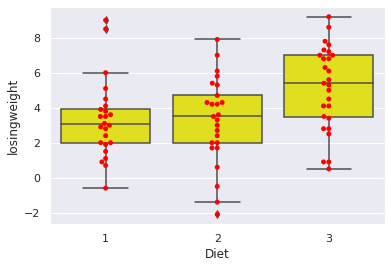

In [102]:
sns.boxplot(x='Diet',y='losingweight',data = df1, color='yellow')
sns.swarmplot(x='Diet',y='losingweight', data = df1, color='red')
plt.show()

In [103]:
mode = ols('losingweight ~ C(Diet)', data=df_diet_losing).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Diet),60.527008,2.0,5.383104,0.006596
Residual,410.401807,73.0,NaN,NaN


In [104]:
def results(p, alpha=0.05):
    cols=['f_score', 'p_value', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    return df[cols]

In [105]:
p = {}
p['f_score'] = anova_table['F'][0]
p['p_value'] = anova_table['PR(>F)'][0]
results(p)

,f_score,p_value,KetLuan
,5.383104,0.006596,Chấp nhận H1 với mức ý nghĩa 0.05


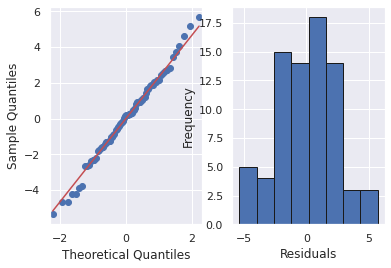

In [106]:
#Kiểm tra các điều kiện cho kiểm định Anova
fig, ax = plt.subplots(1,2)
sm.qqplot(mode.resid,line='s', ax=ax[0])
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Residuals")

plt.hist(mode.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [107]:
#Kiểm tra sự phân phối chuẩn
p_value = stats.shapiro(model.resid)[1]
print('''Phát biểu giả thiết thống kê:
    H0: Mẫu tuân theo phân phối chuẩn
    H1: Mẫu khống tuân theo phân phối chuẩn''')
if p_value > 0.05:
    print(f'Không có bằng chứng thống kê để bác bỏ giả thiết H0. Điều này ngụ ý Mẫu tuân theo phân phối chuẩn')
else:
    print(f'Có bằng chứng thống kê để bác bỏ giả thiết H0. Điều này ngụ ý Mẫu không tuân theo phân phối chuẩn (H1)')

Phát biểu giả thiết thống kê:
    H0: Mẫu tuân theo phân phối chuẩn
    H1: Mẫu khống tuân theo phân phối chuẩn
Không có bằng chứng thống kê để bác bỏ giả thiết H0. Điều này ngụ ý Mẫu tuân theo phân phối chuẩn


In [108]:
#gender = 0: nữ, gender = 1: nam
nguoi = []
print(len(df))
for i in range (1, len(df)+1):
    nguoi.append(i)
df['Person'] = nguoi
gene = df.set_index('Person')
df2 = gene.sort_index()
df2.head(10)

76


,gender,Age,Height,pre.weight,Diet,weight6weeks,losingweight
Person,,,,,,,
1,0.0,22,159,58,1,54.2,3.8
2,0.0,46,192,60,1,54.0,6.0
3,0.0,55,170,64,1,63.3,0.7
4,0.0,33,171,64,1,61.1,2.9
5,0.0,50,170,65,1,62.2,2.8
6,0.0,50,201,66,1,64.0,2.0
7,0.0,37,174,67,1,65.0,2.0
8,0.0,28,176,69,1,60.5,8.5
9,0.0,28,165,70,1,68.1,1.9


**CÂN NẶNG TRƯỚC VÀ SAU KHI GIẢM CÂN**

Phát biểu giả thuyết thống kê
- Cân nặng trung bình của trước và sau khi giảm cân là bằng nhau:
  $$H_{0}: \mu_{0} = \mu_{1}$$
- Cân nặng trung bình của trước và sau khi giảm cân là khác nhau:
  $$H_{1}: \mu_{0} <> \mu_{1}$$

In [92]:
stat, p_value = stats.ttest_ind(df["pre.weight"], df["weight6weeks"])
print('Stat =', stat, 'P_value =', p_value)
if p_value < 0.05:
    print('''Có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý rằng
          có sự thay đổi về cân nặng trước và sau khi giảm cân''')
else:
    print('''Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý rằng
    không có sự thay đổi về cân nặng trước và sau khi giảm cân''')

Stat = 3.0342255247628476 P_value = 0.0028431949414180584
Có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý rằng
          có sự thay đổi về cân nặng trước và sau khi giảm cân


Text(0.5, 1.0, 'Cân nặng trước và sau khi giảm cân')

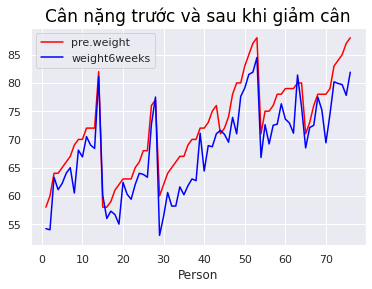

In [109]:
sns.set()
df2[['pre.weight', 'weight6weeks']].plot(color = ['red', 'blue'])
plt.title('Cân nặng trước và sau khi giảm cân', fontsize = 17, color = 'black')

In [97]:
#Chỉ số cân năng đã giảm và cột cân nặng đã giảm
can_nang_giam = df2["pre.weight"] - df2["weight6weeks"] 
df2['weightlost'] = can_nang_giam.values
df2.head(10)

,gender,Age,Height,pre.weight,Diet,weight6weeks,losingweight,weightlost
Person,,,,,,,,
1,0.0,22,159,58,1,54.2,3.8,3.8
2,0.0,46,192,60,1,54.0,6.0,6.0
3,0.0,55,170,64,1,63.3,0.7,0.7
4,0.0,33,171,64,1,61.1,2.9,2.9
5,0.0,50,170,65,1,62.2,2.8,2.8
6,0.0,50,201,66,1,64.0,2.0,2.0
7,0.0,37,174,67,1,65.0,2.0,2.0
8,0.0,28,176,69,1,60.5,8.5,8.5
9,0.0,28,165,70,1,68.1,1.9,1.9
